# Esercitazione #07, 02/05/2025 - Fisica Computazionale


# Conservazione dell'energia

Utilizziamo il principio di conservazione dell'energia per risolvere alcuni esercizi già affrontati utilizzando la cinematica. **Non è necessario** (ma sicuramente aiuta) aver già svolto gli esercizi.

## **Esercizio 1. Piano inclinato**

Il varo è il momento in cui una nave [viene fatta entrare in acqua](https://i.pinimg.com/originals/78/a6/ce/78a6ce6caae8b01c667a6ebae110a3a5.gif). In alcuni casi, la nave viene costruita su una rampa inclinata, e lasciata scivolare in mare a lavori ultimati.

Considera:
- una nave di massa pari a $1.0\times 10^4$ tonnellate,
- su una rampa lunga $100\ m$.

1) Per evitare la formazione di onde violente nel porto, si stima che la velocità di ingresso in acqua della nave non debba superare i 15 m/s. Qual è quindi l'angolo massimo della rampa, in assenza di attrito, perché questa condizione sia rispettata?
2) Come cambia l'angolo in presenza di attrito dinamico ($\mu_d=0.070$)? Quanto è in Joule il lavoro fatto dalle forze non conservative?

(esercizio 1 da Esercizi_dinamica.ipynb)



## **Esercizio 2. Energia elastica**

Un uomo di 80 kg vuole lanciarsi per un salto di bungee jumping da un ponte alto 100 m rispetto alla superficie del fiume sottostante, legato ad una corda di lunghezza a riposo $\ell_0$. La corda, **quando viene allungata rispetto alla sua lunghezza a riposo**, si comporta come una molla di costante $k=50\ N/m$. 

Se l'uomo, per quel brivido in più, vuole arrivare a [sfiorare la superficie dell'acqua](https://www.youtube.com/shorts/QizvIz7XShM), quale deve essere il valore di $\ell_0$? Usa il principio di conservazione dell'energia meccanica per risolvere il problema.

*NOTA 1: Trascura l'attrito dell'aria, considera il corpo dell'uomo come un punto materiale.*

(Esercizi_dinamica2.ipynb, es. 2)



## **Esercizio 3. Moto armonico smorzato**

Una molla di costante elastica $k=5\ N/cm$ è disposta orizzontalmente su un piano e fissata ad una massa $m$ di 200 grammi, libera di muoversi senza attrito sul piano.
Il codice sottostante (soluzione dell'esercizio 2 di Esercizi_dinamica3.ipynb) simula il moto della massa, calcolandone istante per istante la posizione, la velocità e l'accelerazione sia nel caso senza attrito che per diversi valori del coefficiente di attrito viscoso del fluido in cui la massa è immersa:
- b = 5 Ns/m
- b = 20 Ns/m
- b = 100 Ns/m

1. Modifica il codice per calcolare l'energia meccanica totale in funzione del tempo e fanne un grafico. In quale caso l'energia viene dissipata più velocemente?
2. Sempre in funzione del tempo, fai un grafico del lavoro per unità di tempo, ovvero la ***potenza***, delle forze non conservative.

***Competenze richieste**: legge di Hooke, moto armonico, algoritmo Eulero, attrito viscoso, seconda legge di Newton ($F=ma$).*

(Esercizi_dinamica3.ipynb, es. 2)


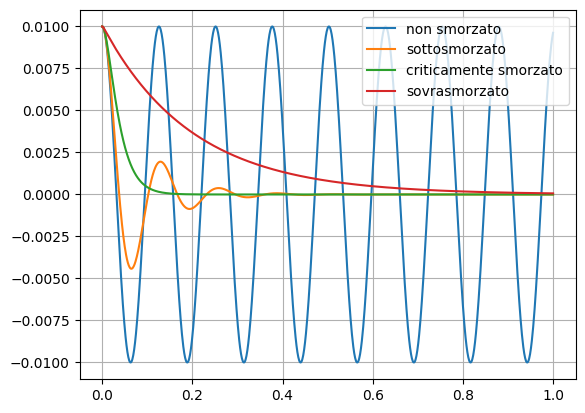

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 0.01
k = 5 * 100
m = 0.2
dt = 0.001
coefficienti_attrito_viscoso = [0, 5, 20, 100]
modalita_pendolo = ['non smorzato', 'sottosmorzato', 'criticamente smorzato', 'sovrasmorzato']

t_max = 1                 # stabiliamo la durata dell'esperimento

# per ognuno dei coefficienti attrito richiesti:
for b, mode in zip(coefficienti_attrito_viscoso, modalita_pendolo):
    ts = [0]
    xs = [x0]
    vels = [0]
    accs = [-k*x0]

    # Metodo di Eulero:
    while ts[-1] < t_max:
        v = vels[-1] + accs[-1]*dt
        x = xs[-1] + v*dt

        # calcolo forza 
        F_hooke = -k*x
        F_viscoso = -b*v
        F = F_hooke + F_viscoso

        # Memorizziamo i risultati
        ts.append(ts[-1] + dt)
        xs.append(x)
        vels.append(v)
        accs.append(F/m)

    plt.plot(ts,xs, label=mode)

plt.legend(loc=1)
plt.grid()



## Soluzione numerica eq. differenziale secondo ordine - Pendolo

vedere notebook prof. Plastina su Teams: pendolosemplice.ipynb

## Soluzione numerica sistema eq. differenziali primo ordine - Preda e predatore

Il modello preda-predatore (o equazioni di Lotka-Volterra) è un noto modello matematico per descrivere l'evoluzione nel tempo delle popolazioni di una preda e di un predatore. Consideriamo per esempio conigli e volpi che convivono in un ecosistema. 

I conigli si nutrono di risorse ampiamente disponibili e hanno un tasso di riproduzione elevato, perciò la loro popolazione aumenterebbe esponenzialmente di numero se non fosse per la presenza delle volpi, che ne predano un certo numero. 
Questo numero sarà direttamente proporzionale al numero di volte in cui preda e predatore si incontrano, e quindi direttamente proporzionale sia alla popolazione dei conigli $C(t)$ che a quella delle volpi $V(t)$. 

Per quanto riguarda le volpi invece la loro unica fonte di nutrimento in questo modello sono i conigli! Quanti più ne cacciano, tanto più si riproducono: il loro tasso di riproduzione è anch'esso proporzionale a $C(t)V(t)$. Infine dobbiamo considerare che la popolazione delle volpi ha un tasso di mortalità naturale.

Insomma il numero $C(t)$ di conigli e $V(t)$ di volpi dipendono l'uno dall'altro e variano in maniera non banale! Matematicamente il problema è descritto da questo sistema di equazioni differenziali ordinarie al primo ordine:
$$C'(t) = \alpha C(t) - \beta C(t) V(t)$$
$$V'(t) = -\gamma V(t) + \delta C(t) V(t)$$
dove $\alpha, \beta, \gamma, \delta$ sono positivi. In sintesi:
- $\alpha$ è il tasso di crescita delle prede in assenza di predatori,
- $\beta$ rappresenta l'effetto negativo della presenza dei predatori sulla crescita delle prede,
- $\gamma$ è il tasso di mortalità dei predatori,
- $\delta$ rappresenta l'effetto positivo della presenza di prede sulla crescita dei predatori.

Una volta note le condizioni iniziali, abbiamo un problema di Cauchy ben definito che possiamo risolvere numericamente, utilizzando Eulero come faremmo per un esercizio di dinamica.


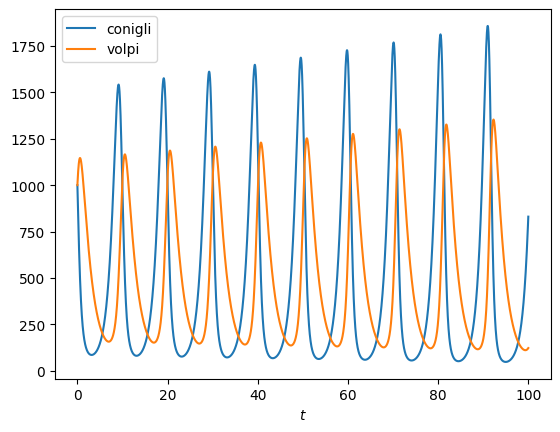

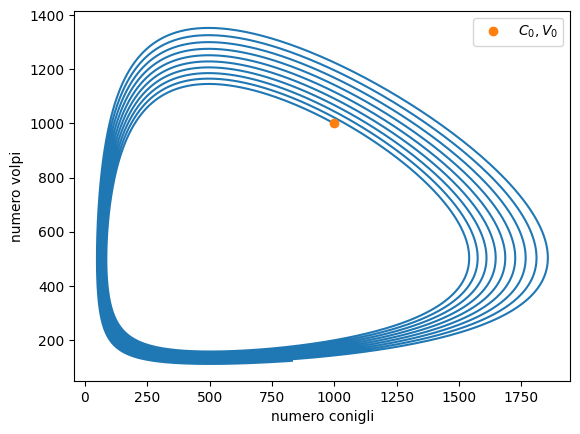

In [35]:
import matplotlib.pyplot as plt
import numpy as np

C0, V0 = 1000, 1000
alpha, beta, gamma, delta = 1., 0.002, 0.5, .001

ts = [0]
Cs = [C0]
Vs = [V0]
dt = 0.01

while ts[-1] < 100:
    C = Cs[-1] + (alpha * Cs[-1] - beta * Cs[-1] * Vs[-1]) * dt
    V = Vs[-1] + (-gamma * Vs[-1] + delta * Cs[-1] * Vs[-1]) * dt
    t = ts[-1] + dt

    Cs.append(C)
    Vs.append(V)
    ts.append(t)

plt.figure(1)
plt.plot(ts, Cs, label='conigli')
plt.plot(ts, Vs, label='volpi')
plt.xlabel('$t$')
plt.legend()

plt.figure(2)
plt.plot(Cs,Vs)
plt.plot(C0, V0, 'o', label='$C_0, V_0$')
plt.xlabel('numero conigli')
plt.ylabel('numero volpi')
plt.legend()